In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [5]:
df=pd.read_csv("D:\\Churn_pred(Classification)\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
len(df)

7043

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


To show  all features

In [8]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data preparation

Convert the dtype of TotalCharges from object to numeric type 


In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [11]:
df['TotalCharges']=df['TotalCharges'].fillna(0)

In [12]:
print(df['TotalCharges'].isna().sum())

df.dtypes

0


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
str_co_values=list(df.dtypes[df.dtypes=='object'].index)
for c in str_co_values :
    df[c]=df[c].str.lower().str.replace(' ','_')

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


Now for columns name 

In [15]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


Convert dtype of churn feature from object to int(0 or 1)

In [16]:
df['churn']=(df['churn']=='yes').astype(int)

to check the latest version

In [17]:
test_data= df.head().T

In [18]:
test_data

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


Split the data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_train_full,df_test= train_test_split(df,test_size=0.2,random_state=1)

In [21]:
df_train,df_val=train_test_split(df_train_full,test_size=0.33,random_state=11)


In [22]:
y_train=df_train.churn.values
y_val=df_val.churn.values


In [23]:
del df_train['churn']

del df_val['churn']

EDA

In [24]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [25]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

so 0.2699   of  the customers stopped using the services (churn=1)

In [26]:
mean_value=df_train_full.churn.mean()
print(mean_value)

0.26996805111821087


split the features to categorical and numerical

In [27]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [28]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [29]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

the unique values in categorical feature

In [30]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Feature importance
(may be useful)



In [31]:
from IPython.display import display

In [32]:
female_mean=df_train_full[df_train_full.gender=='female'].churn.mean()
male_mean=df_train_full[df_train_full.gender=='male'].churn.mean()
print("female mean: ",female_mean)
print("male mean :" ,male_mean)

female mean:  0.27682403433476394
male mean : 0.2632135306553911


we can get the churn rate for all categorical feature using for loop 


In [33]:
for c in categorical :
    rate=df_train_full.groupby(by=c).churn.agg(['mean'])
    display(rate)

,mean
gender,
female,0.276824
male,0.263214


,mean
seniorcitizen,
0,0.242270
1,0.413377


,mean
partner,
no,0.329809
yes,0.205033


,mean
dependents,
no,0.313760
yes,0.165666


,mean
phoneservice,
no,0.241316
yes,0.273049


,mean
multiplelines,
no,0.257407
no_phone_service,0.241316
yes,0.290742


,mean
internetservice,
dsl,0.192347
fiber_optic,0.425171
no,0.077805


,mean
onlinesecurity,
no,0.420921
no_internet_service,0.077805
yes,0.153226


,mean
onlinebackup,
no,0.404323
no_internet_service,0.077805
yes,0.217232


,mean
deviceprotection,
no,0.395875
no_internet_service,0.077805
yes,0.230412


,mean
techsupport,
no,0.418914
no_internet_service,0.077805
yes,0.159926


,mean
streamingtv,
no,0.342832
no_internet_service,0.077805
yes,0.302723


,mean
streamingmovies,
no,0.338906
no_internet_service,0.077805
yes,0.307273


,mean
contract,
month-to-month,0.431701
one_year,0.120573
two_year,0.028274


,mean
paperlessbilling,
no,0.172071
yes,0.338151


,mean
paymentmethod,
bank_transfer_(automatic),0.168171
credit_card_(automatic),0.164339
electronic_check,0.455890
mailed_check,0.193870


we note that the techsupport and contract feature are usful ,because the users with no tech support tend to churn more than those who do , and contract : month-to-month is more than others .


Now , we get the correlation for categorical features (mutual information)

In [34]:
from sklearn.metrics import mutual_info_score


In [35]:
def calculate_mis(series) :
    return mutual_info_score(series,df_train_full.churn)

In [36]:
df_mis=df_train_full[categorical].apply(calculate_mis)

In [37]:
df_mis.sort_values().to_frame(name='MIS')

,MIS
gender,0.000117
phoneservice,0.000229
multiplelines,0.000857
seniorcitizen,0.009410
partner,0.009968
dependents,0.012346
paperlessbilling,0.017589
streamingmovies,0.031581
streamingtv,0.031853
paymentmethod,0.043210


now we can remove the latest 3 in the table  from categorical

In [38]:
categorical.remove('gender')
categorical.remove('phoneservice')
categorical.remove('multiplelines')

In [39]:
categorical

['seniorcitizen',
 'partner',
 'dependents',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

Calculate the correlation for numerical features

In [40]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame(name='Correlation')

,Correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [41]:
#numerical.remove('totalcharges')

In [42]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
scaler.fit(df_train[numerical])
df_train[numerical]=scaler.transform(df_train[numerical])
df_val[numerical]=scaler.transform(df_val[numerical])



from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#df[categorical] = le.fit_transform(df[categorical])

In [45]:
df_train[numerical].T

,2935,3639,2356,6660,755,4202,5389,1194,1069,2974,...,1019,3547,6974,4428,4161,3977,6273,3790,5712,3405
tenure,1.578286,1.130276,0.560082,-1.272685,-0.498850,-0.906131,0.763723,-0.743219,-0.498850,-0.173025,...,-0.376665,1.537558,0.763723,-0.539578,-1.231957,1.252461,-1.231957,-1.231957,-0.376665,1.293189
monthlycharges,0.702099,1.180532,-0.656783,0.138944,1.115744,-1.507330,0.138944,-0.482354,-0.364407,0.981185,...,-1.510653,0.833336,1.125712,1.273561,-0.498967,1.499487,0.188781,-1.517298,-1.484073,0.725356
totalcharges,1.647281,1.639867,-0.098973,-0.974567,-0.196512,-0.921795,0.596085,-0.669118,-0.541705,0.161710,...,-0.798637,1.773400,1.165463,-0.121981,-0.957920,1.936718,-0.942456,-0.992487,-0.798461,1.332027


Feature Engineering 

In [46]:
from sklearn.feature_extraction import DictVectorizer

In [47]:
train_dict=df_train[categorical+numerical].to_dict(orient='records')

In [48]:
train_dict[2]

{'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 0.560082295342224,
 'monthlycharges': -0.6567830477855827,
 'totalcharges': -0.09897279812440228}

In [49]:
dv=DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [50]:
X_trian=dv.transform(train_dict)

In [51]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'internetservice=dsl',
       'internetservice=fiber_optic', 'internetservice=no',
       'monthlycharges', 'onlinebackup=no',
       'onlinebackup=no_internet_service', 'onlinebackup=yes',
       'onlinesecurity=no', 'onlinesecurity=no_internet_service',
       'onlinesecurity=yes', 'paperlessbilling=no',
       'paperlessbilling=yes', 'partner=no', 'partner=yes',
       'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'seniorcitizen', 'streamingmovies=no',
       'streamingmovies=no_internet_service', 'streamingmovies=yes',
       'streamingtv=no', 'streamingtv=no_internet_service',
       'streamingtv=yes', 'techsupport=no',
       'techsupport=no_in

In [52]:
X_trian.shape

(3774, 38)

Training Model 

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model=LogisticRegression(penalty='l1',solver='liblinear',random_state=1, C=1.0)
model.fit(X_trian,y_train)

LogisticRegression(penalty='l1', random_state=1, solver='liblinear')

In [55]:
val_dict=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dict)

In [56]:
y_pred=model.predict_proba(X_val)[:,1]

In [57]:
y_pred

array([0.26110577, 0.29270471, 0.37197583, ..., 0.05975679, 0.64566148,
       0.05423212])

In [58]:
churn=y_pred>0.5

In [59]:
(y_val==churn).mean()

0.8026881720430108

In [60]:
from sklearn.metrics import accuracy_score 


In [61]:
thresholds = np.linspace(0, 1, 21) 
accuracies = [] 
for t in thresholds:
 acc = accuracy_score(y_val, y_pred >= t) 
 accuracies.append(acc) #D 

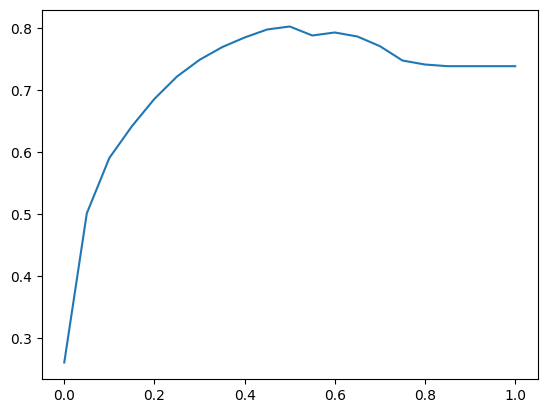

In [62]:
plt.plot(thresholds, accuracies) 


as we note the best threshold is ~ 0.5

the dataset is imbalance data , so the accuracy it doesn't clear for me .
and Evidence of this if i compare this model to Dummy Baseline(this model predict the majority value ,it's "no churn" in our dataset ) ,the main model only ~ 6% better than dummy baseline 

, so we need other metrics 

In [63]:
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [64]:
confusion_table = np.array(
    
    [[true_negative, false_positive], 
     [false_negative, true_positive]])

confusion_table

array([[1208,  166],
       [ 201,  285]])

cofusion table Normalization

In [65]:
confusion_table / confusion_table.sum()

array([[0.64946237, 0.08924731],
       [0.10806452, 0.15322581]])

Calculate the precision and recall

In [66]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
print(precision)
print(recall)

0.6319290465631929
0.5864197530864198


ROC

In [67]:

scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [68]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,486,1374,0,0
1,0.01,483,1180,3,194
2,0.02,482,1065,4,309
3,0.03,480,1007,6,367
4,0.04,477,954,9,420
...,...,...,...,...,...
96,0.96,0,0,486,1374
97,0.97,0,0,486,1374
98,0.98,0,0,486,1374
99,0.99,0,0,486,1374


In [69]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [70]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,486,1374,0,0,1.000000,1.000000
1,0.01,483,1180,3,194,0.993827,0.858806
2,0.02,482,1065,4,309,0.991770,0.775109
3,0.03,480,1007,6,367,0.987654,0.732897
4,0.04,477,954,9,420,0.981481,0.694323
...,...,...,...,...,...,...,...
96,0.96,0,0,486,1374,0.000000,0.000000
97,0.97,0,0,486,1374,0.000000,0.000000
98,0.98,0,0,486,1374,0.000000,0.000000
99,0.99,0,0,486,1374,0.000000,0.000000


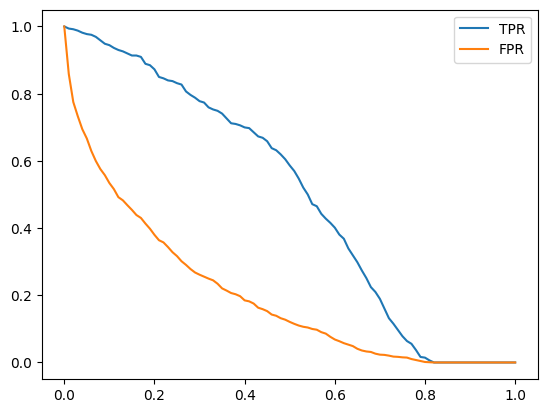

In [73]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()


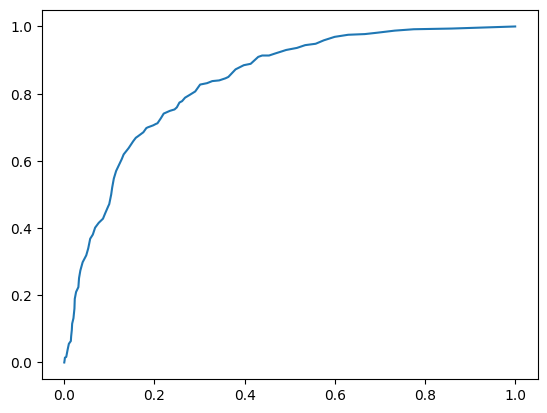

In [75]:
plt.plot(df_scores.fpr, df_scores.tpr)

ROC (using sklearn)

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [77]:
fpr, tpr , thresholds =roc_curve(y_val,y_pred)

Text(0, 0.5, 'True Positive Rate ')

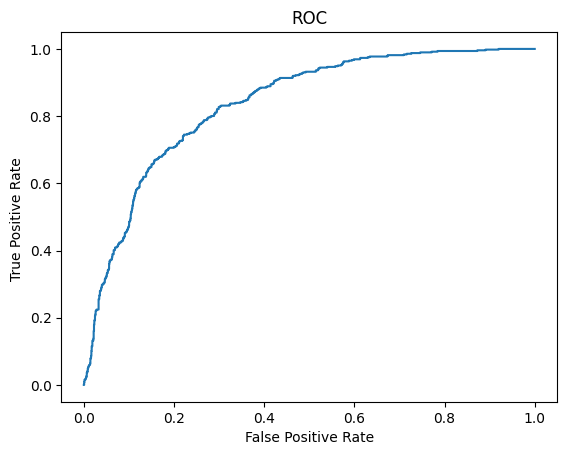

In [80]:
plt.plot(fpr,tpr)
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")


AUC Score 

In [81]:
from sklearn.metrics import  roc_auc_score

In [83]:
roc_auc_score(y_val,y_pred)

0.8363276546803959

K-fold Cross Validation 

i will put the training processes in function
and also predicting  in function

In [99]:
def train(df, y,C):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear',C=C)
    model.fit(X, y)

    return dv, model

In [100]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [101]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=1)


In [105]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.churn.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train,2)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [106]:
aucs

[0.8498640332045228,
 0.8429300742574257,
 0.8599986711625666,
 0.8309851041066579,
 0.8250930521091812,
 0.8318514818514818,
 0.8405731032237057,
 0.8262887413029728,
 0.8436712613013191,
 0.8609626567174212]

the mean of aucs is


In [107]:
print(np.mean(aucs))

0.8412218179237254


the final result 

In [108]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.855


Pickling the model

In [109]:
import pickle


with open('D:\\Churn_pred(Classification)\\churn_model.pkl','wb') as f_out :
  pickle.dump((model,dv),f_out)
